In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt


import pandas as pd


In [2]:
df1 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP1.csv')
df2 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP2.csv')
df3 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP3.csv')
df4 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP4.csv')
df5 = pd.read_csv('PROJECT_DATA/FOOD-DATA-GROUP5.csv')

df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [3]:
# Check shape before cleaning
df.shape[0]

2395

In [4]:
# Remove rows with missing values in key numeric columns
df = df.dropna(subset=[
    "Protein", "Fat", "Carbohydrates", "Caloric Value",
    "Sugars", "Dietary Fiber", "Saturated Fats",
    "Monounsaturated Fats", "Polyunsaturated Fats",
    "Sodium", "Potassium"
])

In [5]:
# Check shape after cleaning - We're expecting the same number of rows since the dataset seems complete
df.shape[0]


2395

In [6]:
# Prepare feature matrix X using relevant nutritional columns
feature_cols = [
    "Protein", "Fat", "Carbohydrates", "Caloric Value",
    "Sugars", "Dietary Fiber", "Saturated Fats",
    "Monounsaturated Fats", "Polyunsaturated Fats",
    "Sodium", "Potassium"
]

X = df[feature_cols]


In [7]:
# Explore basic statistics of key nutritional columns
df[["Protein", "Fat", "Carbohydrates", "Caloric Value"]].describe()


,Protein,Fat,Carbohydrates,Caloric Value
count,2395.000000,2395.000000,2395.000000,2395.000000
mean,13.400777,10.176276,18.589021,223.769520
std,32.294246,29.008915,29.406134,384.728244
min,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.300000,0.500000,44.500000
50%,3.500000,2.100000,6.800000,117.000000
75%,13.300000,9.400000,25.050000,258.000000
max,560.300000,550.700000,390.200000,6077.000000


In [8]:
# Test filtering for high-protein, high-carb foods
# df[(df["Protein"] >= 10) & (df["Carbohydrates"] >=30)].filter(items=["food", "Protein", "Carbohydrates", "Caloric Value"])

In [9]:
# Assign labels or target variable y

def assign_label(row):
    # Muscle Gain
    if row["Protein"] >= 15 or (row["Protein"] >= 10 and row["Caloric Value"] >= 200):
        return "Muscle Gain"

    # Endurance
    if row["Carbohydrates"] >= 30 or row["Sugars"] >= 12 or \
       (row["Carbohydrates"] >= 20 and row["Sodium"] >= 140):
        return "Endurance"

    # Weight Loss
    if (row["Caloric Value"] < 150) and (row["Fat"] < 5) and (row["Carbohydrates"] < 20 or row["Dietary Fiber"] >=3):
        return "Weight Loss"

    # Default
    return "No Category"


In [10]:
df["Label"] = df.apply(assign_label, axis=1)
df["Label"].value_counts()

Label
Weight Loss    1016
Muscle Gain     649
Endurance       386
No Category     344
Name: count, dtype: int64

In [11]:
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Label
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,No Category
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,No Category
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Weight Loss
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Weight Loss
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Weight Loss


In [12]:
# Create training data excluding "No Category"
train_df = df[df["Label"] != "No Category"].copy()

# Assign feature matrix X and target vector y for training
X = train_df[feature_cols].values
y = train_df["Label"].values

# Use LabelEncoder to convert string labels to integers
le = LabelEncoder()

# Fit and transform the labels - This will assign integer labels automatically
y_encoded = le.fit_transform(y)

# Show list of classes
list(le.classes_)

['Endurance', 'Muscle Gain', 'Weight Loss']

In [13]:
# Use StandardScaler to standardize features
scaler = StandardScaler()

# Compute mean and standard deviation of each feature and scale each row
X_scaled = scaler.fit_transform(X)

In [14]:
# Test 20% of data
# Stratify to maintain class distribution in train and test sets to keep ratio of classes
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [22]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 75), (200,), (100, 50, 50), (100, 50, 25)],
    'alpha': [0.0001, 0.0005, 0.001, 0.0003, 0.0007, 0.001],
    'learning_rate_init': [0.0005, 0.001, 0.0008, 0.002, 0.0015, 0.0025]
}

print("Running GridSearchCV for MLPClassifier:")
grid_search = GridSearchCV(
    estimator=MLPClassifier(
        max_iter=500,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=15
    ),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_scaled, y_encoded)

print("Best params:", grid_search.best_params_)
print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

# Show top results sorted by CV rank
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cols = ['rank_test_score', 'mean_test_score', 'std_test_score', 'param_hidden_layer_sizes', 'param_alpha', 'param_learning_rate_init']
display(cv_results_df.sort_values('rank_test_score')[cols].head(10))


Running GridSearchCV for MLPClassifier:
Best params: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.0025}
Best CV accuracy: 0.9693


,rank_test_score,mean_test_score,std_test_score,param_hidden_layer_sizes,param_alpha,param_learning_rate_init
41,1,0.969292,0.011042,"(100, 50, 25)",0.0001,0.0025
83,2,0.967338,0.012185,"(100, 50, 25)",0.0005,0.0025
125,3,0.966851,0.011688,"(100, 50, 25)",0.0010,0.0025
251,3,0.966851,0.011688,"(100, 50, 25)",0.0010,0.0025
243,5,0.966847,0.013048,"(100, 50, 50)",0.0010,0.0020
117,5,0.966847,0.013048,"(100, 50, 50)",0.0010,0.0020
123,7,0.965879,0.013766,"(100, 50, 25)",0.0010,0.0020
249,7,0.965879,0.013766,"(100, 50, 25)",0.0010,0.0020
201,9,0.965871,0.009629,"(100, 50, 50)",0.0007,0.0020
39,10,0.965392,0.018638,"(100, 50, 25)",0.0001,0.0020


In [16]:
# Choose best parameters based on grid search results
best_params = grid_search.best_params_

clf = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    alpha=best_params['alpha'],
    learning_rate_init=best_params['learning_rate_init'],
    max_iter=500,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=15
)

clf.fit(X_train, y_train)


MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(100, 50),
              max_iter=500, n_iter_no_change=15, random_state=42)

Accuracy: 0.9708029197080292
F1 Score (macro): 0.960338208835566

Classification Report:
               precision    recall  f1-score   support

   Endurance       0.95      0.90      0.92        77
 Muscle Gain       0.97      0.98      0.97       130
 Weight Loss       0.98      1.00      0.99       204

    accuracy                           0.97       411
   macro avg       0.97      0.96      0.96       411
weighted avg       0.97      0.97      0.97       411

Confusion Matrix (rows = true labels, columns = predicted labels):
             Endurance  Muscle Gain  Weight Loss
Endurance           69            4            4
Muscle Gain          3          127            0
Weight Loss          1            0          203


<Figure size 600x400 with 0 Axes>

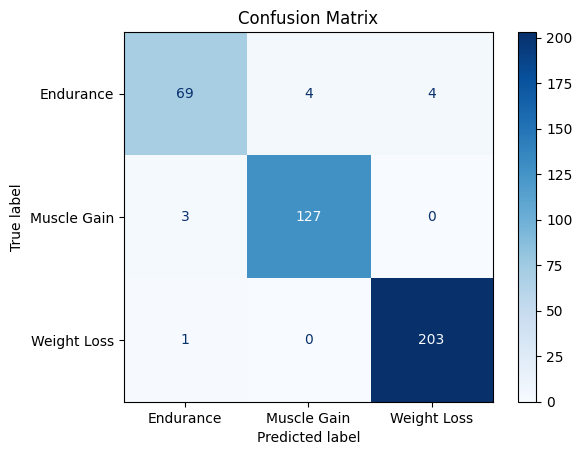

In [20]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix (numeric)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix (rows = true labels, columns = predicted labels):")
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))

# Confusion Matrix (plot)
plt.figure(figsize=(6,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()



In [ ]:
scores = cross_val_score(clf, X_scaled, y, cv=5)
print("Cross-validation accuracy:", scores.mean())

In [ ]:
unlabeled_df = df[df["Label"] == "No Category"].copy()
X_unlabeled = unlabeled_df[feature_cols].values
X_unlabeled_scaled = scaler.transform(X_unlabeled)

unlabeled_df["ML_Prediction"] = le.inverse_transform(clf.predict(X_unlabeled_scaled))


In [ ]:
print(unlabeled_df.shape)
unlabeled_df.head(100)


In [ ]:
unlabeled_df.to_csv("mlp_unlabeled_with_predictions.csv", index=False)


In [ ]:
muscle_gain_df = df[df["Label"] == "Muscle Gain"].copy()
X_muscle_gain = muscle_gain_df[feature_cols].values
X_muscle_gain_scaled = scaler.transform(X_muscle_gain)

muscle_gain_df["ML_Prediction"] = le.inverse_transform(clf.predict(X_muscle_gain_scaled))

In [ ]:
muscle_gain_df.to_csv("mlp_muscle_gain_with_predictions.csv", index=False)
